# Time Series Data

Reliance India stock from **20th October 2023** to **20th October 2024**.

In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [15]:

# Load the data
data = pd.read_csv('RELI Historical Data.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Sort the data by date (in case it's not sorted)
data = data.sort_values('Date')

C:\Users\daans\AppData\Local\Temp\ipykernel_9016\1085131156.py:5: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  data['Date'] = pd.to_datetime(data['Date'])


In [16]:

data.columns

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')

In [17]:
data.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Vol.        0
Change %    0
dtype: int64

In [18]:
data['Date']

19   2024-09-20
18   2024-09-23
17   2024-09-24
16   2024-09-25
15   2024-09-26
14   2024-09-27
13   2024-09-30
12   2024-10-01
11   2024-10-03
10   2024-10-04
9    2024-10-07
8    2024-10-08
7    2024-10-09
6    2024-10-10
5    2024-10-11
4    2024-10-14
3    2024-10-15
2    2024-10-16
1    2024-10-17
0    2024-10-18
Name: Date, dtype: datetime64[ns]

# Plot the Raw Data

Plot the raw stock price data for the period specified (16th October 2023 to 16th October 2024).

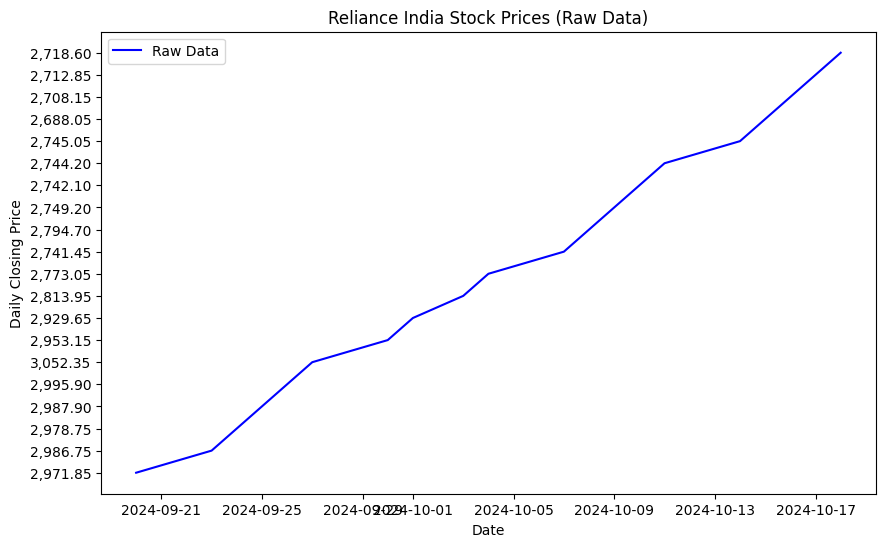

In [19]:
# Plot the raw daily closing price
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Price'], label='Raw Data', color='blue')
plt.title('Reliance India Stock Prices (Raw Data)')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price')
plt.legend()
plt.show()

# Simple Moving Average (SMA)

The **Simple Moving Average (SMA)** is the unweighted average of a stock's price over a specific period (e.g., 7, 15, or 30 days). It smooths out short-term price fluctuations and helps reveal the overall trend.

A shorter window responds quickly to price changes, while a longer one shows a more stable long-term trend. SMA is useful for identifying patterns like upward or downward trends in stock prices.

19    2971.85
18    2986.75
17    2978.75
16    2987.90
15    2995.90
Name: Price, dtype: float64


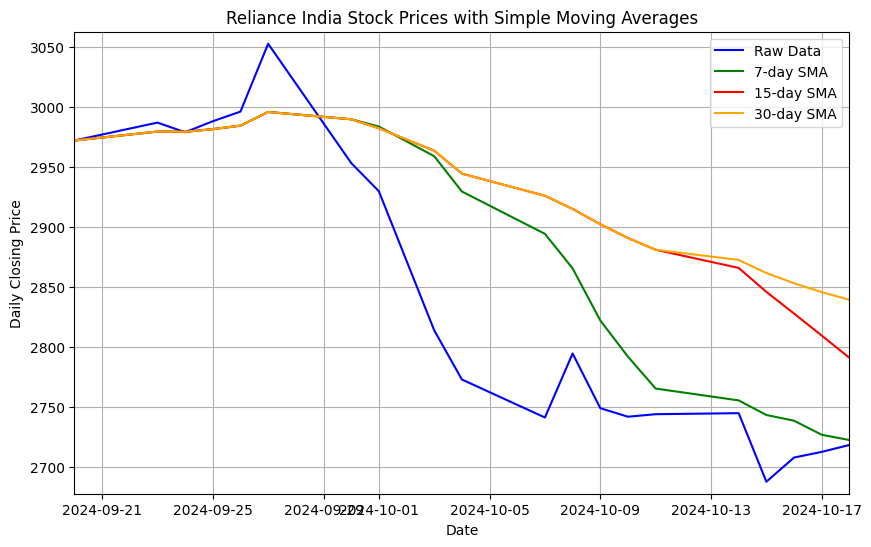

<Figure size 2500x1200 with 0 Axes>

In [20]:
# Remove commas from 'Price' and convert it to numeric
data['Price'] = data['Price'].str.replace(',', '').astype(float)

# Ensure the data is now numeric
print(data['Price'].head())  # Check the first few rows to ensure conversion worked

# Plot the raw data after conversion
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Price'], label='Raw Data', color='blue')

# Simple Moving Average (SMA) function
def plot_sma(window_size, color, label):
    sma = data['Price'].rolling(window=window_size, min_periods=1).mean()
    plt.plot(data['Date'], sma, label=label, color=color)

# Plot SMAs for 7, 15, 30 days
plot_sma(7, 'green', '7-day SMA')
plot_sma(15, 'red', '15-day SMA')
plot_sma(30, 'orange', '30-day SMA')

# Add gridlines for better readability
plt.grid(True)

# Set axis limits to ensure proper scaling
plt.xlim([data['Date'].min(), data['Date'].max()])
plt.ylim([data['Price'].min() - 10, data['Price'].max() + 10])  # Slightly expand y-limits for better visibility

# Add title, labels, and legend
plt.title('Reliance India Stock Prices with Simple Moving Averages')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price')
plt.legend()
plt.figure(figsize=(25, 12))
# Ensure the plot is shown
plt.show()


# Centered Moving Average (CMA)

The **Centered Moving Average (CMA)** averages the prices from an equal number of days before and after a central point, offering a balanced view of past and future data.

This technique is more common in **time series forecasting** and helps to smooth cyclical trends by minimizing lag, making it ideal for recognizing repetitive patterns over time.

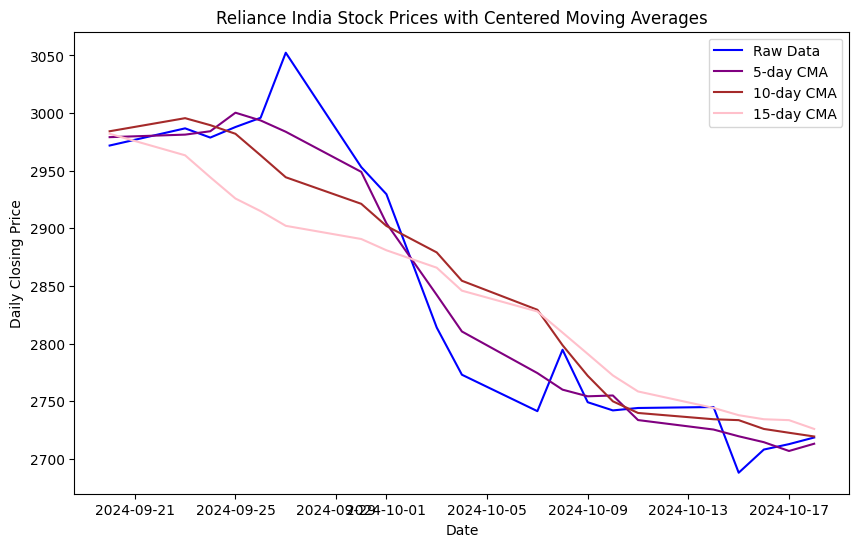

In [21]:
# Centered Moving Average (CMA) function
def plot_cma(window_size, color, label):
    cma = data['Price'].rolling(window=window_size, center=True, min_periods=1).mean()
    plt.plot(data['Date'], cma, label=label, color=color)

# Plot the raw data
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Price'], label='Raw Data', color='blue')

# Plot CMAs for 5, 10, and 15 days
plot_cma(5, 'purple', '5-day CMA')
plot_cma(10, 'brown', '10-day CMA')
plot_cma(15, 'pink', '15-day CMA')

plt.title('Reliance India Stock Prices with Centered Moving Averages')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price')

plt.legend()
plt.show()


# Weighted Moving Average (WMA)

The **Weighted Moving Average (WMA)** assigns greater importance to more recent prices by giving them higher weights, making it more responsive to recent price changes compared to the **Simple Moving Average (SMA)**.

It's useful for traders who want to capture the latest trends quickly, but it can also be more sensitive to short-term market fluctuations.

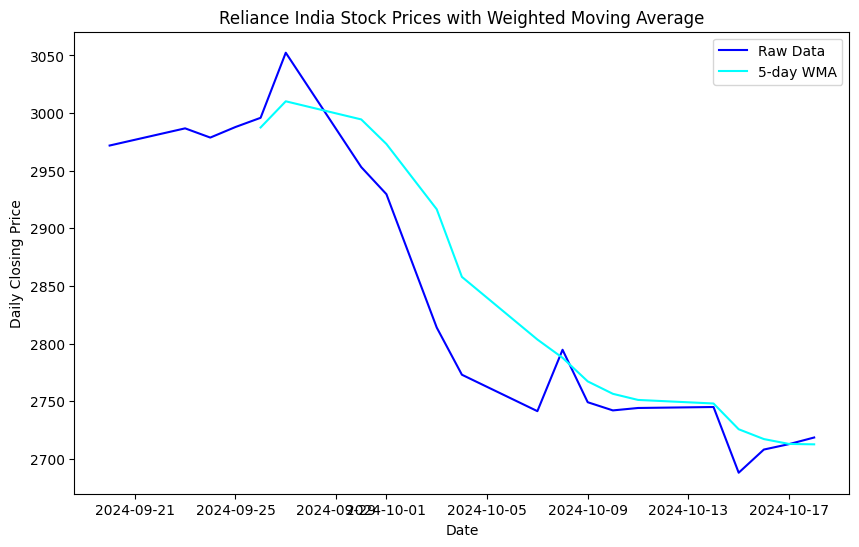

In [22]:
import numpy as np

# Weighted Moving Average (WMA) function
def weighted_moving_average(values, weights):
    return np.convolve(values, weights[::-1], 'valid') / sum(weights)

# Assign weights: more recent days get higher weights
weights = np.array([1, 2, 3, 4, 5])

# Apply the WMA to the 'Price' column
wma = weighted_moving_average(data['Price'], weights)

# Adjust dates for plotting (due to 'valid' convolution, it trims the length)
adjusted_dates = data['Date'][len(data['Date']) - len(wma):]

# Plot the raw data
plt.figure(figsize=(10,6))
plt.plot(data['Date'], data['Price'], label='Raw Data', color='blue')

# Plot the WMA
plt.plot(adjusted_dates, wma, label='5-day WMA', color='cyan')

plt.title('Reliance India Stock Prices with Weighted Moving Average')
plt.xlabel('Date')
plt.ylabel('Daily Closing Price')


plt.legend()
plt.show()
